In [11]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# Load the dataset
data_equinor = pd.read_csv('/Users/Selma/dev/STAT3007-timeseries_forecasting/data/dataeqnr_max_daily.csv')
data_equinor.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Scaled_close
0,2001-06-18 00:00:00-04:00,2.507967,2.514673,2.504614,2.504614,7189500,0.0,0.0,-0.973381
1,2001-06-19 00:00:00-04:00,2.531437,2.591789,2.531437,2.554907,1410700,0.0,0.0,-0.970356
2,2001-06-20 00:00:00-04:00,2.575024,2.578377,2.551554,2.561612,550400,0.0,0.0,-0.969953
3,2001-06-21 00:00:00-04:00,2.538142,2.548201,2.531436,2.538142,643600,0.0,0.0,-0.971364
4,2001-06-22 00:00:00-04:00,2.521378,2.531436,2.507966,2.518025,822600,0.0,0.0,-0.972574


In [4]:
# Load the dataset
data_energy = pd.read_csv('/Users/Selma/dev/STAT3007-timeseries_forecasting/data/energy_sector_dataset.csv')
data_energy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Scaled_close
0,2022-05-13,17.600000,18.950001,17.60,18.110001,18.110001,6325600,ACDC,0.198526
1,2022-05-16,18.000000,18.590000,17.16,17.990000,17.990000,1283600,ACDC,0.185887
2,2022-05-17,18.219999,18.370001,17.68,18.080000,18.080000,898000,ACDC,0.195366
3,2022-05-18,18.049999,18.299999,17.77,17.980000,17.980000,790800,ACDC,0.184834
4,2022-05-19,17.820000,18.000000,16.75,16.879999,16.879999,2122300,ACDC,0.068984


In [6]:
equinor_frequency = data_equinor.index.to_series().diff().mode()[0]
energy_frequency = data_energy.index.to_series().diff().mode()[0]

print(f"Equinor data frequency: {equinor_frequency}")
print(f"Energisektor data frequency: {energy_frequency}")

Equinor data frequency: 1.0
Energisektor data frequency: 1.0


In [7]:
# Split the data
train_size = int(len(data_equinor) * 0.8)
equinor_train, equinor_test = data_equinor[:train_size], data_equinor[train_size:]

train_size_energy = int(len(data_energy) * 0.8)
energy_train, energy_test = data_energy[:train_size_energy], data_energy[train_size_energy:]

print(f"Equinor training size: {equinor_train.shape}")
print(f"Equinor test size: {equinor_test.shape}")

print(f"Energisektor training size: {energy_train.shape}")
print(f"Energisektor test size: {energy_test.shape}")

Equinor training size: (4596, 9)
Equinor test size: (1150, 9)
Energisektor training size: (130627, 9)
Energisektor test size: (32657, 9)


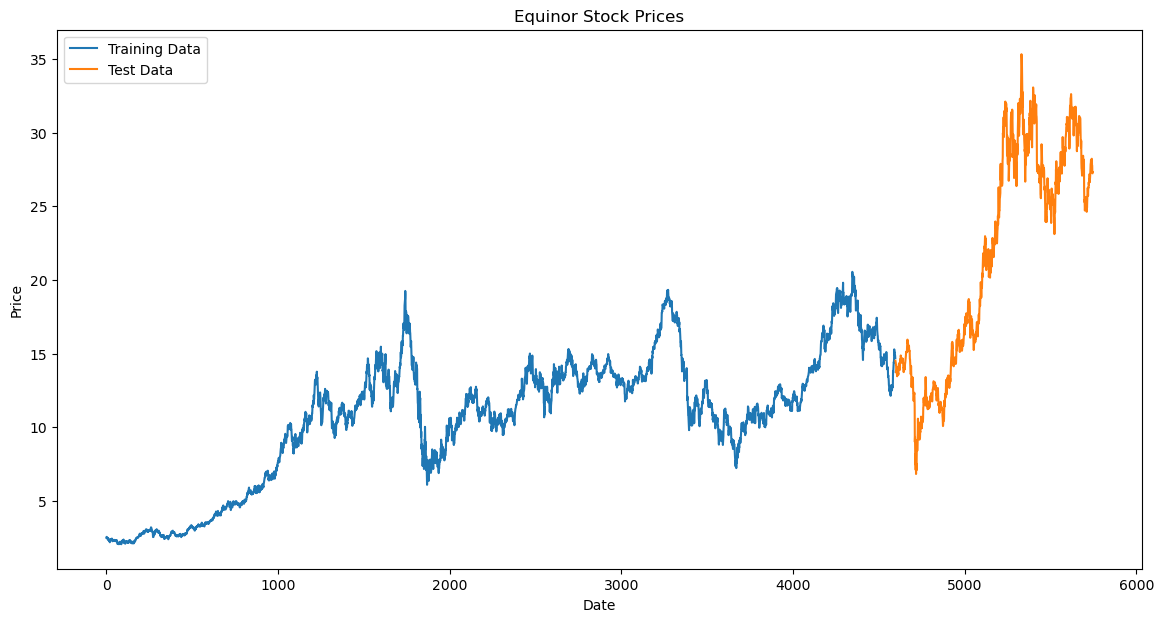

ValueError: No axis named 1 for object type Series

<Figure size 1400x700 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot Equinor data
plt.figure(figsize=(14, 7))
plt.plot(equinor_train.index, equinor_train['Close'], label='Training Data')
plt.plot(equinor_test.index, equinor_test['Close'], label='Test Data')
plt.title('Equinor Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Energy Sector data
plt.figure(figsize=(14, 7))
plt.plot(energy_train.index, energy_train['Close'].mean(axis=1), label='Training Data')
plt.plot(energy_test.index, energy_test['Close'].mean(axis=1), label='Test Data')
plt.title('Energy Sector Stock Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

Equinor data varians: 0.16453166949073442
Random noise varians: 0.16999719366475616


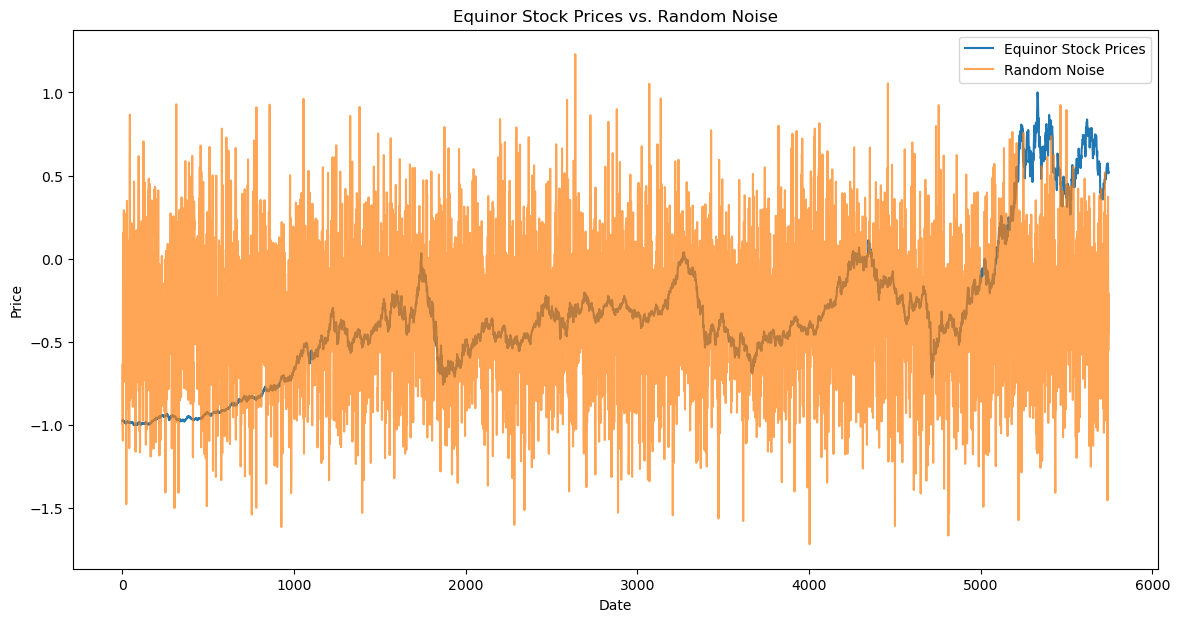

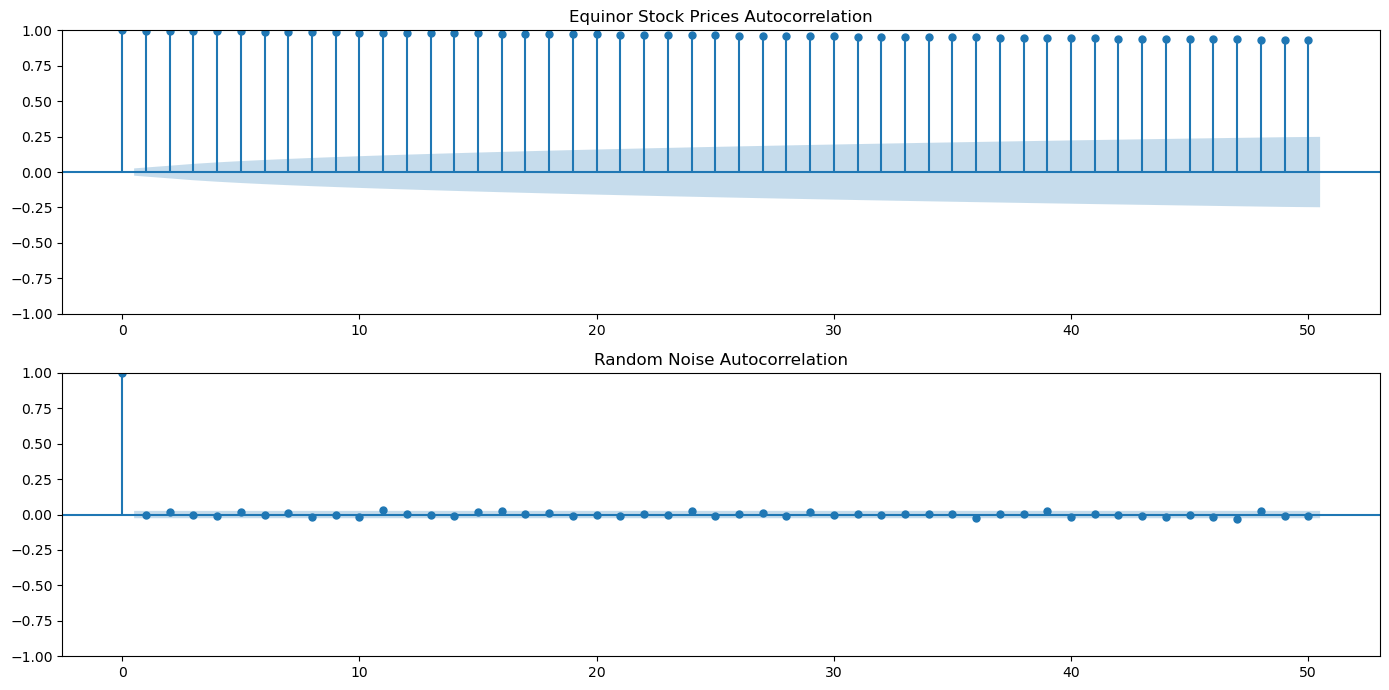

In [15]:
# Set the mean and standard deviation of the Gaussian distribution
mean = 0
std_dev = 1

# Set the number of samples
num_samples = 5746

# Generate random noice with the same length and variance as Equinor data
random_noise = np.random.normal(loc=np.mean(data_equinor['Scaled_close']), scale=np.std(data_equinor['Scaled_close']), size=len(data_equinor['Scaled_close']))
gaussian_noise = np.random.normal(mean, std_dev, num_samples)

# Calculate variance
equinor_variance = np.var(data_equinor['Scaled_close'])
noise_variance = np.var(random_noise)
gaussian_variance = np.var(gaussian_noise)

print(f"Equinor data varians: {equinor_variance}")
print(f"Random noise varians: {noise_variance}")

# Plot timeseries
plt.figure(figsize=(14, 7))
plt.plot(data_equinor['Scaled_close'].index, data_equinor['Scaled_close'], label='Equinor Stock Prices')
plt.plot(data_equinor['Scaled_close'].index, random_noise, label='Random Noise', alpha=0.7)
#plt.plot(data_equinor['Scaled_close'].index, gaussian_noise, label='Gaussian Noise')
plt.title('Equinor Stock Prices vs. Random Noise')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plot_acf(data_equinor['Scaled_close'], ax=plt.gca(), lags=50, title='Equinor Stock Prices Autocorrelation')

plt.subplot(2, 1, 2)
plot_acf(random_noise, ax=plt.gca(), lags=50, title='Random Noise Autocorrelation')

plt.tight_layout()
plt.show()